In [1]:
# import statement

import matplotlib.pyplot as plt

import pandas as pd
from numpy import set_printoptions
from numpy import concatenate
from numpy import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.feature_selection import f_classif
from sklearn.utils import shuffle

from warnings import simplefilter

#import random

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [12]:
# creating name column to recreate dataframe
names = ["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1"]


raw_df = pd.read_csv('dataR2.csv')

# shuffling the dataset
random.seed(1890)
raw_df = shuffle(raw_df)

# dropping the dependant variable column
x1_temp = raw_df.drop("Classification",axis=1).values

# normalizing data to eliminate the effect of unit
x1_temp = preprocessing.scale(x1_temp)

# recreating the dataframe with normalized data and without the target column
x1_df = pd.DataFrame(data = x1_temp, columns=names)


x1 = x1_df.values # array of attributes value
y1 = raw_df["Classification"].values # array of target value

# splitting data in training and testing 
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)



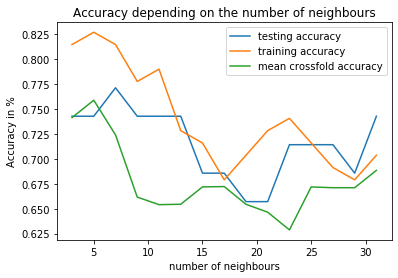

value of K for the max testing accuracy : 7
value of K for the max training accuracy : 5
value of K for the max crossfold accuracy : 5


In [13]:
from sklearn.neighbors import KNeighborsClassifier

# creating the lists to store the accuracies
train_acc=[]
test_acc = []
mean_acc_crossfold = [] # mean accuracy after applying the crossfold validation


for i in range(3,33,2):
    # applying the model for different values of K
    model_knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model into the train data
    model_knn.fit(X_train, y_train)
    
    # adding the accuracy values to the lists
    train_acc.append(model_knn.score(X_train, y_train))
    test_acc.append(model_knn.score(X_test, y_test))

    # calculating and adding the accuracy for the crossfold valifation
    scores = cross_val_score(model_knn, x1, y1, cv=5) # 5 folds
    mean_acc_crossfold.append(scores.mean())
               
# plotting the accuracies        
i = range(3,33,2)
plt.plot(i,test_acc,label="testing accuracy")
plt.plot(i,train_acc,label="training accuracy")
plt.plot(i,mean_acc_crossfold,label="mean crossfold accuracy")
plt.legend()
plt.title("Accuracy depending on the number of neighbours")
plt.xlabel("number of neighbours")
plt.ylabel("Accuracy in %")
plt.show()

# finding the best K value
print("value of K for the max testing accuracy : "+ str(test_acc.index(max(test_acc))*2+3))
print("value of K for the max training accuracy : "+ str(train_acc.index(max(train_acc))*2+3))
print("value of K for the max crossfold accuracy : "+ str(mean_acc_crossfold.index(max(mean_acc_crossfold))*2+3))



------------- metrics ------------- 
training accuracy : 0.8271604938271605
testing accuracy : 0.7428571428571429
cross fold validation accuracy : [0.75       0.79166667 0.73913043 0.69565217 0.81818182]
mean accuracy : 0.7589262187088275

confusion matrix
[[11  1]
 [ 8 15]]
Precision cancer: 0.9375
Precision healthy: 0.5789473684210527
Sensitivity: 0.6521739130434783
Specificity: 0.9166666666666666
ROC curve


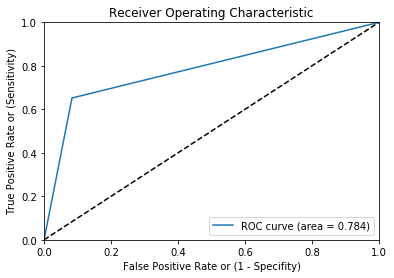

In [16]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)


y_pred = model_knn.predict(X_test)

print("------------- metrics ------------- ")
# accuracies
print("training accuracy : " + str(model_knn.score(X_train, y_train)))
print("testing accuracy : " + str(model_knn.score(X_test, y_test)))

scores = cross_val_score(model_knn, x1, y1, cv=5)
print("cross fold validation accuracy : " + str(scores))
print("mean accuracy : " + str(scores.mean())+ "\n")

# confusion matrix and metrics
print("confusion matrix")
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Precision cancer: " + str(conf[1][1]/(conf[1][1]+conf[0][1])))
print("Precision healthy: " + str(conf[0][0]/(conf[1][0]+conf[0][0])))
print("Sensitivity: " + str(conf[1][1]/(conf[1][1]+conf[1][0])))
print("Specificity: " + str(conf[0][0]/(conf[0][0]+conf[0][1])))

#ROC curve
print("ROC curve")
y_test_bin = [True if x == 2 else False for x in y_test]
y_pred_bin = [True if x == 2 else False for x in y_pred]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()